In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/sampled_data.csv")

In [4]:
# Converting 'mem_util' from string to numeric
df['mem_util'] = pd.to_numeric(df['mem_util'])
df['index'] = pd.to_numeric(df['index'])

# Separating the data based on the 'index' column
df_0 = df[df['index'] == 0]
df_1 = df[df['index'] == 1]

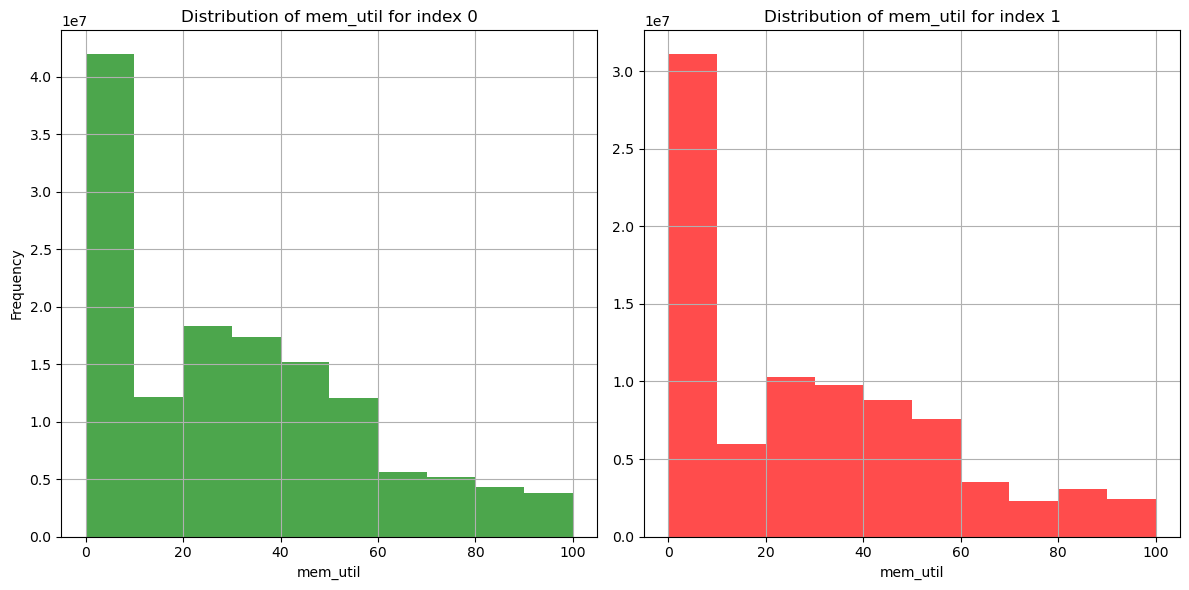

In [15]:
# Plotting the distributions
plt.figure(figsize=(12, 6))

# Distribution for index "0"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df_0['mem_util'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of mem_util for index 0')
plt.xlabel('mem_util')
plt.ylabel('Frequency')
plt.grid(True)

# Distribution for index "1"
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df_1['mem_util'], bins=10, color='red', alpha=0.7)
plt.title('Distribution of mem_util for index 1')
plt.xlabel('mem_util')
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
ser0 = pd.Series(df_0['mem_util'])
df_ser0 = pd.DataFrame(ser0)
df_ser0['cdf'] = df_ser0.rank(method = 'average', pct = True)

In [8]:
ser1 = pd.Series(df_1['mem_util'])
df_ser1 = pd.DataFrame(ser1)
df_ser1['cdf'] = df_ser1.rank(method = 'average', pct = True)

<Figure size 1000x600 with 0 Axes>

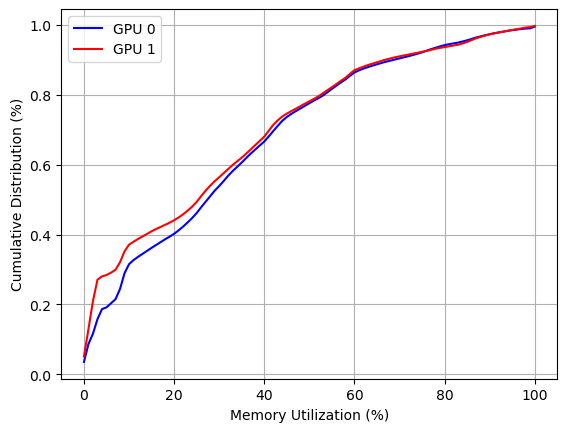

In [10]:
# Plotting both on the same figure
plt.figure(figsize=(10, 6))

# Plot for ser0
ax = df_ser0.sort_values('mem_util').plot(
    x='mem_util', 
    y='cdf', 
    grid=True, 
    legend=True, 
    color='blue',
    label='GPU 0'
)

# Plot for ser1 on the same axis
df_ser1.sort_values('mem_util').plot(
    x='mem_util', 
    y='cdf', 
    grid=True, 
    legend=True, 
    color='red',
    label='GPU 1',
    ax=ax  # This ensures that the plot is on the same axes
)

# Setting the labels
ax.set_xlabel('Memory Utilization (%)')
ax.set_ylabel('Cumulative Distribution (%)')

# Show the plot with both series
plt.show()